In [1]:
import numpy as np
import matplotlib.pyplot as plt
import reading

Datos de la señal segun la descripcion del dataset y del paper.

In [2]:
data_length = 4096 # d
timesteps = 2048
data_dim = data_length//timesteps # L
srate = 173.61



`reshape_signal`  segun la metodologia descrita en la seccion 4.2.1

In [ ]:
def reshape_signal(raw_signal):
    return reading.segment_data(raw_signal[0:data_length], timesteps, data_dim)

In [3]:
ubonn_data, ubonn_labels = reading.load_ubonn()
ubonn_data.shape

YES069.txt
Read N-EYES070.txt
Read N-EYES071.txt
Read N-EYES072.txt
Read N-EYES073.txt
Read N-EYES074.txt
Read N-EYES075.txt
Read N-EYES076.txt
Read N-EYES077.txt
Read N-EYES078.txt
Read N-EYES079.txt
Read N-EYES080.txt
Read N-EYES081.txt
Read N-EYES082.txt
Read N-EYES083.txt
Read N-EYES084.txt
Read N-EYES085.txt
Read N-EYES086.txt
Read N-EYES087.txt
Read N-EYES088.txt
Read N-EYES089.txt
Read N-EYES090.txt
Read N-EYES091.txt
Read N-EYES092.txt
Read N-EYES093.txt
Read N-EYES094.txt
Read N-EYES095.txt
Read N-EYES096.txt
Read N-EYES097.txt
Read N-EYES098.txt
Read N-EYES099.txt
Read N-EYES100.txt
Read N-MUSC001.txt
Read N-MUSC002.txt
Read N-MUSC003.txt
Read N-MUSC004.txt
Read N-MUSC005.txt
Read N-MUSC006.txt
Read N-MUSC007.txt
Read N-MUSC008.txt
Read N-MUSC009.txt
Read N-MUSC010.txt
Read N-MUSC011.txt
Read N-MUSC012.txt
Read N-MUSC013.txt
Read N-MUSC014.txt
Read N-MUSC015.txt
Read N-MUSC016.txt
Read N-MUSC017.txt
Read N-MUSC018.txt
Read N-MUSC019.txt
Read N-MUSC020.txt
Read N-MUSC021.txt
R

(2000, 4097)

In [4]:
def gaussian_noise(signal, strength = 1):
    noise = np.random.normal(0,1,len(signal)) * strength
    return signal + noise

Comparacion de una señal en crudo vs una señal con ruido blanco añadido

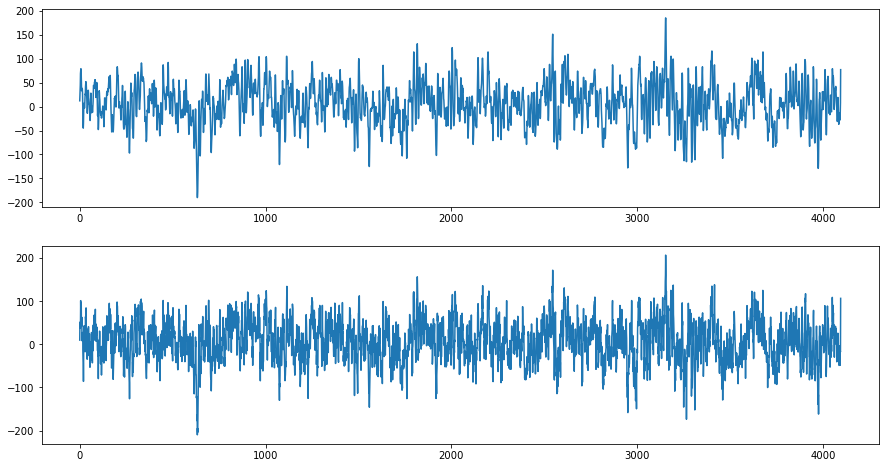

In [5]:
raw = ubonn_data[0]
noisy = gaussian_noise(ubonn_data[0], strength=20)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8))
ax1.plot(raw[:len(raw)])
ax2.plot(noisy[:len(raw)])


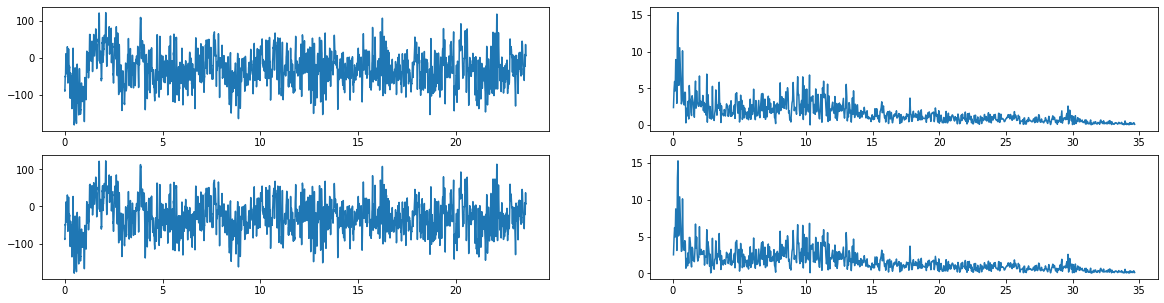

In [6]:
from scipy.signal import butter, lfilter, freqz, firwin
from scipy.fft import fft, fftfreq
eyes = 5
orig = eyes + 300
z_eyes_1 = ubonn_data[eyes]
z_normal = ubonn_data[orig]

original_fft = fft(z_eyes_1)
original_freqs = fftfreq(z_eyes_1.shape[0], 1/srate)

eyes_fft = fft(z_normal)
eyes_freqs = fftfreq(z_normal.shape[0], 1/srate)

t = np.linspace(0, data_length/srate, data_length + 1, endpoint=False)

fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 5))
ax11.plot(t, z_eyes_1, label='Raw signal')
ax12.plot(original_freqs[1:data_length//5], 2/data_length * np.abs(original_fft[1:data_length//5]))

ax21.plot(t, z_normal, label='Noisy signal')
ax22.plot(eyes_freqs[1:data_length//5], 2/data_length * np.abs(eyes_fft[1:data_length//5]))
ax1.grid(True)
ax2.grid(True)
plt.show()